<a href="https://colab.research.google.com/github/rahvlrawat/Spoiler-Alert/blob/main/Spoiler_Classification_%2B_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1> AIM: Using the dataset containing movie and review data to make a spoiler classification model for spoiler reviews and recommendation engine for movies  <h1/>

# Installations/Downloads

In [ ]:
os.system('pip install -q kaggle')
os.system('mkdir ~/.kaggle')
os.system('cp /content/drive/MyDrive/kaggle.json   ~/.kaggle/')
os.system('chmod 600 ~/.kaggle/kaggle.json')
os.system('kaggle datasets download -d  rmisra/imdb-spoiler-dataset')
os.system('kaggle datasets download -d   rtatman/glove-global-vectors-for-word-representation')


0

In [ ]:
os.system('unzip  /content/imdb-spoiler-dataset.zip')

0

In [ ]:
os.system('unzip /content/glove-global-vectors-for-word-representation.zip')

0

In [ ]:
pip install --user -U nltk

     |████████████████████████████████| 1.5MB 4.0MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
pip install IMDbpy

     |████████████████████████████████| 307kB 3.8MB/s 


# Imports 

In [ ]:
import os

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import norm
from datetime import datetime
import re
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn import svm
import re
import nltk
import imdb
import pickle


In [ ]:
from nltk.corpus import stopwords

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
import tqdm
from tqdm import tqdm
tqdm.pandas()

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
ia=imdb.IMDb() 

# EDA + Data Preprocessing 

In [ ]:
df_reviews = pd.read_json('/content/IMDB_reviews.json', lines=True)
df_details = pd.read_json('/content/IMDB_movie_details.json', lines=True)

In [ ]:
df_reviews

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"
...,...,...,...,...,...,...,...
573908,8 August 1999,tt0139239,ur0100166,False,"Go is wise, fast and pure entertainment. Assem...",10,The best teen movie of the nineties
573909,31 July 1999,tt0139239,ur0021767,False,"Well, what shall I say. this one´s fun at any ...",9,Go - see the movie
573910,20 July 1999,tt0139239,ur0392750,False,"Go is the best movie I have ever seen, and I'v...",10,It's the best movie I've ever seen
573911,11 June 1999,tt0139239,ur0349105,False,Call this 1999 teenage version of Pulp Fiction...,3,Haven't we seen this before?


In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573913 entries, 0 to 573912
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review_date     573913 non-null  object
 1   movie_id        573913 non-null  object
 2   user_id         573913 non-null  object
 3   is_spoiler      573913 non-null  bool  
 4   review_text     573913 non-null  object
 5   rating          573913 non-null  int64 
 6   review_summary  573913 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 26.8+ MB


In [ ]:
df_reviews.describe()

,rating
count,573913.000000
mean,6.954254
std,2.956295
min,1.000000
25%,5.000000
50%,8.000000
75%,10.000000
max,10.000000


In [ ]:
df_details.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [ ]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       1572 non-null   object 
 1   plot_summary   1572 non-null   object 
 2   duration       1572 non-null   object 
 3   genre          1572 non-null   object 
 4   rating         1572 non-null   float64
 5   release_date   1572 non-null   object 
 6   plot_synopsis  1572 non-null   object 
dtypes: float64(1), object(6)
memory usage: 86.1+ KB


In [ ]:
df_details.describe()

,rating
count,1572.000000
mean,7.071819
std,0.967966
min,2.400000
25%,6.500000
50%,7.100000
75%,7.800000
max,9.500000


In [ ]:
print(df_reviews.columns)
print(df_details.columns)

Index(['review_date', 'movie_id', 'user_id', 'is_spoiler', 'review_text',
       'rating', 'review_summary'],
      dtype='object')
Index(['movie_id', 'plot_summary', 'duration', 'genre', 'rating',
       'release_date', 'plot_synopsis'],
      dtype='object')


df_reviews consists of info about the reviews by the users and  df_details has the info about the movie so we will combine both these tables to get a better formulated table with movie and review info corresponding each user review.

In [ ]:
df_reviews["movie_id"]=df_reviews.movie_id.str.slice(2)


In [ ]:
df_details["movie_id"]=df_details.movie_id.str.slice(2)


In [ ]:
df=pd.merge(df_reviews,df_details,on='movie_id')

As 'movie_id' column is common key in both tables we will merge using this column.

In [ ]:
df.columns

Index(['review_date', 'movie_id', 'user_id', 'is_spoiler', 'review_text',
       'rating_x', 'review_summary', 'plot_summary', 'duration', 'genre',
       'rating_y', 'release_date', 'plot_synopsis'],
      dtype='object')

In [ ]:
df.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating_x,review_summary,plot_summary,duration,genre,rating_y,release_date,plot_synopsis
0,10 February 2006,0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
1,6 September 2000,0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,3 August 2001,0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
3,1 September 2002,0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
4,20 May 2004,0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."


In [ ]:
df.rename(columns = {'rating_x':'userrating','rating_y':'actualrating'}, inplace = True)

In [ ]:
df['is_spoiler']=df['is_spoiler']+0

Coverting 'is_spoiler' values into *int* values

In [ ]:
df.head()

,review_date,movie_id,user_id,is_spoiler,review_text,userrating,review_summary,plot_summary,duration,genre,actualrating,release_date,plot_synopsis
0,10 February 2006,0111161,ur1898687,1,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
1,6 September 2000,0111161,ur0842118,1,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,3 August 2001,0111161,ur1285640,1,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
3,1 September 2002,0111161,ur1003471,1,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
4,20 May 2004,0111161,ur0226855,1,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573906 entries, 0 to 573905
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review_date     573906 non-null  object 
 1   movie_id        573906 non-null  object 
 2   user_id         573906 non-null  object 
 3   is_spoiler      573906 non-null  int64  
 4   review_text     573906 non-null  object 
 5   userrating      573906 non-null  int64  
 6   review_summary  573906 non-null  object 
 7   plot_summary    573906 non-null  object 
 8   duration        573906 non-null  object 
 9   genre           573906 non-null  object 
 10  actualrating    573906 non-null  float64
 11  release_date    573906 non-null  object 
 12  plot_synopsis   573906 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 61.3+ MB


In [ ]:
df["review_date"]=pd.to_datetime(df["review_date"])
df["release_date"]=pd.to_datetime(df["release_date"])

Converting both review and release date columns to *datetime* type for better analysis

Let's check  if there are any underlying missing values in the dataset 

In [ ]:
df[df.isna().any(axis=1)==True]

,review_date,movie_id,user_id,is_spoiler,review_text,userrating,review_summary,plot_summary,duration,genre,actualrating,release_date,plot_synopsis


No missing values were found in the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90a0ff98d0>,
      dtype=object)

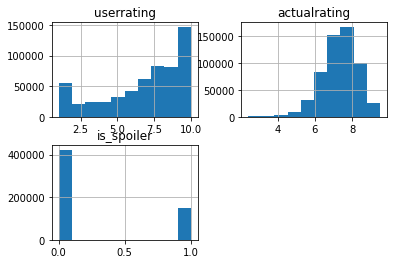

In [ ]:
df[["userrating","actualrating","is_spoiler"]].hist()

Above graph shows distribution of data for the features such as userrating,actualrating and is_spoiler.
All the values here seems reasonable as rating has range 0-10 and is_spoiler can only have either 0 or 1 value.

In [ ]:
print('Total no. of reviews:' , len(df))

Total no. of reviews: 573906


In [ ]:
print("Total no. of users who gave reviews:",df['user_id'].nunique() )

Total no. of users who gave reviews: 263404


In [ ]:
print('Total films in dataset :', df['movie_id'].nunique())

Total films in dataset : 1570


Now lets have a look at data heat map to see if the features bear any correlation wrt eachother 

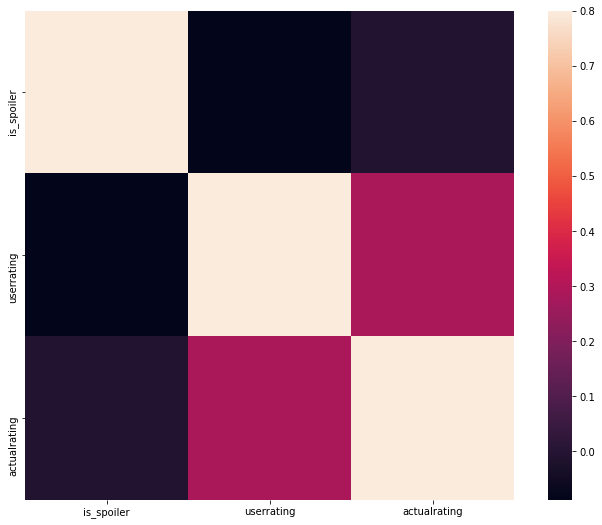

In [ ]:
#correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

as can be see from the heatmap that there is quite little direct correlation existing  amongst the features 

Lets have a look at distribution of movie's actual rating wrt the reviews containing spoilers and not containing spoilers

Distribution of rating across all movie reviews:


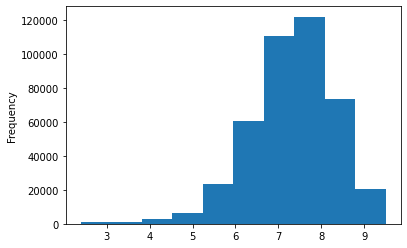

In [ ]:
print("Distribution of rating across all movie reviews:")
df[df["is_spoiler"]==0]['actualrating'].plot(kind='hist')

Distribution of rating across  movie reviews with spoilers:


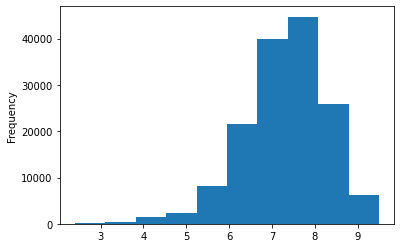

In [ ]:
print("Distribution of rating across  movie reviews with spoilers:")
df[df["is_spoiler"]==1]['actualrating'].plot(kind='hist')

Most of the ratings are concentrated around 6-9  for both reviews either containing spoiler or not.

On similar grounds lets also try to find different insights into the data through some more visualisations 

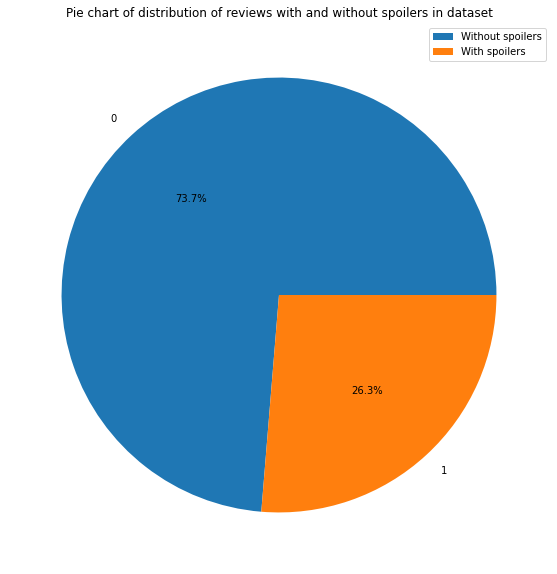

In [ ]:
labels, frequencies = np.unique(df.is_spoiler.values,return_counts = True)
plt.figure(figsize = (10,10))
x=plt.pie(frequencies,labels = labels, autopct = '%1.1f%%')
plt.title('Pie chart of distribution of reviews with and without spoilers in dataset')
plt.legend(labels=['Without spoilers', 'With spoilers'])

About 70-30  ratio is there between non spoiler and spoiler reviews in the dataset 

Text(0.5, 1.0, 'Pie chart for reviews for top 10 genres:')

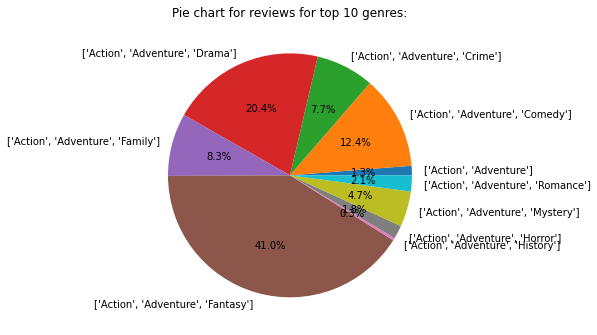

In [ ]:
labels, frequencies = np.unique(df[df["is_spoiler"]==1].genre.values,return_counts = True)
plt.figure(figsize = (8,8))
x=plt.pie(frequencies[:10],labels = labels[:10], autopct = '%1.1f%%')
plt.tight_layout()
plt.title('Pie chart for reviews for top 10 genres:')

These are the top 10 genre sets with most spoiler reviews.This indicates that some movie genres have much more tendency to correspond with spoiler in the reviews than other genres.Using this we will create a qunatitative criteria which will help in classification. 

In [ ]:
df_temp=pd.DataFrame()
df_temp["is_spoiler"]=df["is_spoiler"]
df_temp["days_elapsed"]=abs(df["review_date"]-df["release_date"]).dt.days
df_temp=df_temp.groupby(['is_spoiler', 'days_elapsed']).size().reset_index(name='count').sort_values('days_elapsed')

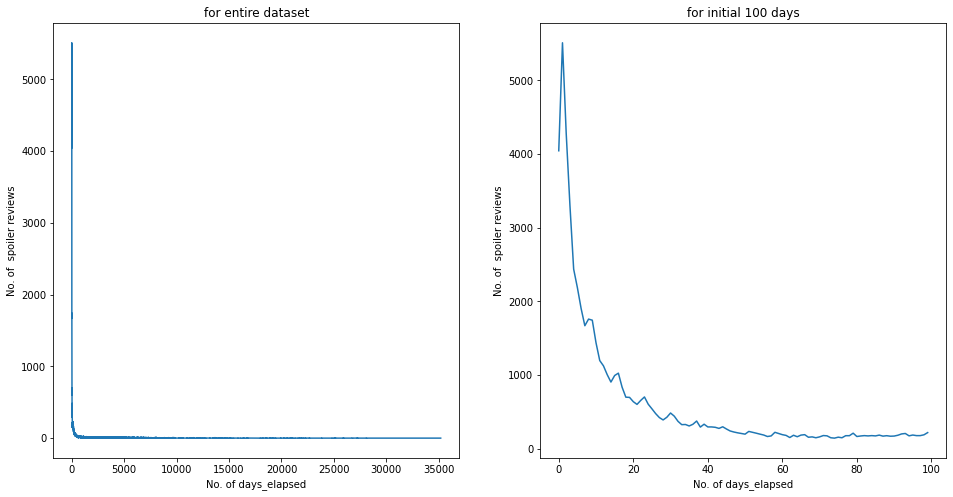

In [ ]:
fig = plt.figure(figsize=(16, 8))


ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(df_temp[df_temp["is_spoiler"]==1]["days_elapsed"].values,df_temp[df_temp["is_spoiler"]==1]["count"].values)
ax1.set_title('for entire dataset')
ax1.set_xlabel('No. of days_elapsed')
ax1.set_ylabel('No. of  spoiler reviews')

ax2.plot(df_temp[df_temp["is_spoiler"]==1]["days_elapsed"][:100].values,df_temp[df_temp["is_spoiler"]==1]["count"][:100].values)
ax2.set_xlabel('No. of days_elapsed')
ax2.set_title('for initial 100 days')
ax2.set_ylabel('No. of  spoiler reviews')

plt.show()

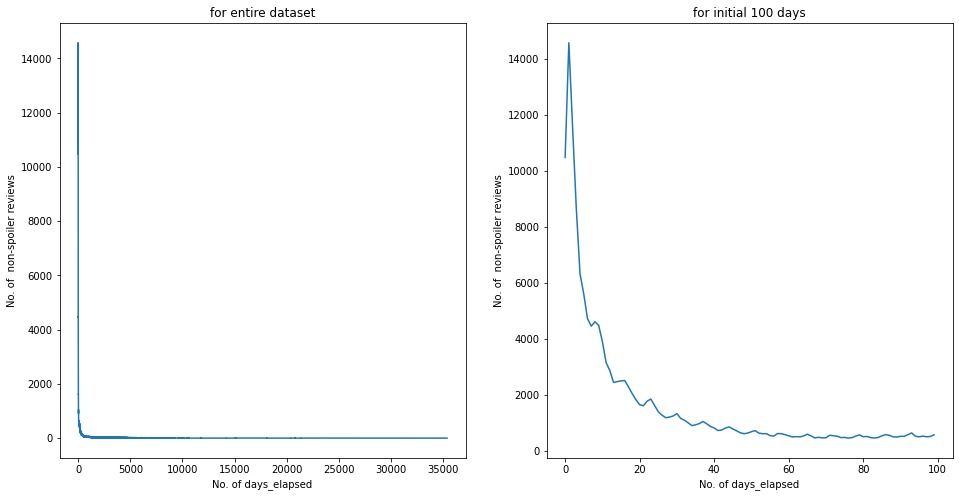

In [ ]:
fig = plt.figure(figsize=(16, 8))


ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(df_temp[df_temp["is_spoiler"]==0]["days_elapsed"].values,df_temp[df_temp["is_spoiler"]==0]["count"].values)
ax1.set_title('for entire dataset')
ax1.set_xlabel('No. of days_elapsed')
ax1.set_ylabel('No. of  non-spoiler reviews')

ax2.plot(df_temp[df_temp["is_spoiler"]==0]["days_elapsed"][:100].values,df_temp[df_temp["is_spoiler"]==0]["count"][:100].values)
ax2.set_xlabel('No. of days_elapsed')
ax2.set_title('for initial 100 days')
ax2.set_ylabel('No. of  non-spoiler reviews')

plt.show()

In [ ]:
df["days_elapsed"]=abs(df["review_date"]-df["release_date"]).dt.days

Above graphs clearly shows most reviews for a movie are around the time of the release of the movie and as it  moves away from the release date after some days the review logging for the respective movie also depreciates.Same trend can be seen for the reviews with spoilers.

In [ ]:
spoilermovies=df[df['is_spoiler']==1].movie_id.value_counts()[:20].index.to_list()
pivot_df=df.groupby(['is_spoiler', 'movie_id']).size().reset_index(name='count').sort_values('count')
pivot_df=pivot_df[pivot_df["movie_id"].isin(spoilermovies)]
pivot_df=pivot_df.pivot(index='movie_id',  columns='is_spoiler', values='count')
pivot_df=pivot_df.fillna(0)

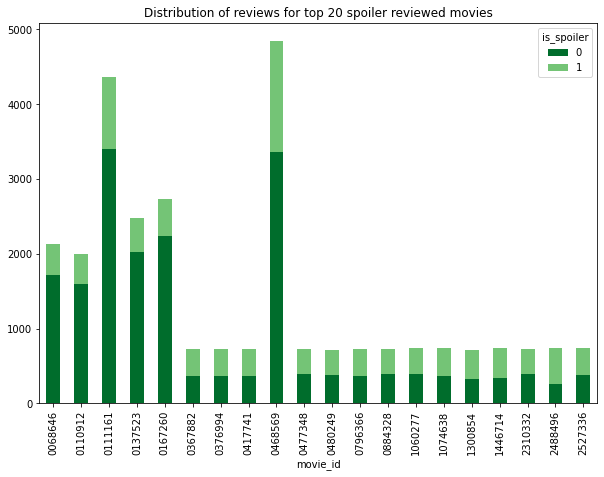

In [ ]:
colors = ["#006D2C","#74C476"]
pivot_df.plot.bar(stacked=True, color=colors, figsize=(10,7),title="Distribution of reviews for top 20 spoiler reviewed movies")


Based on graph it can be seen that some movies have more chances  of having spoiler reviews when compared with others that can be attributed to various factors beyond the scope of our current application so for the time being we can use this criteria of tendency of movie to have spoilers for spoiler classification.

In [ ]:
spoilermovies=df[df['is_spoiler']==1].user_id.value_counts()[:20].index.to_list()
pivot_df=df.groupby(['is_spoiler', 'user_id']).size().reset_index(name='count').sort_values('count')
pivot_df=pivot_df[pivot_df["user_id"].isin(spoilermovies)]
pivot_df=pivot_df.pivot(index='user_id',  columns='is_spoiler', values='count')
pivot_df=pivot_df.fillna(0)

In [ ]:
colors = ["#006D2C","#74C476"]
pivot_df.plot.bar(stacked=True, color=colors, figsize=(10,7),title="Distribution of reviews for top 20 users who gave most reviews")

As can be seen from the above graphs most of the top users have mostly given more spoiler reviews when compared to non spoiler ones.
This indicates that some users are more likely to give spoiler reviews than others.Same as movie tendency for reviews we will use this user tendency for giving spoiler reviews for help in classification,

In [ ]:
df.groupby(['movie_id']).size().reset_index(name='count').sort_values('count')

As can be seen from the above data some movie have much more reviews than other movies which is  a good indicator of popularity of the movie.

In [ ]:
df_temp2=pd.DataFrame()
df_temp2['word_count'] = df['review_text'].apply(lambda text: len(text.split(' ')))
df_temp2["is_spoiler"]=df.is_spoiler

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


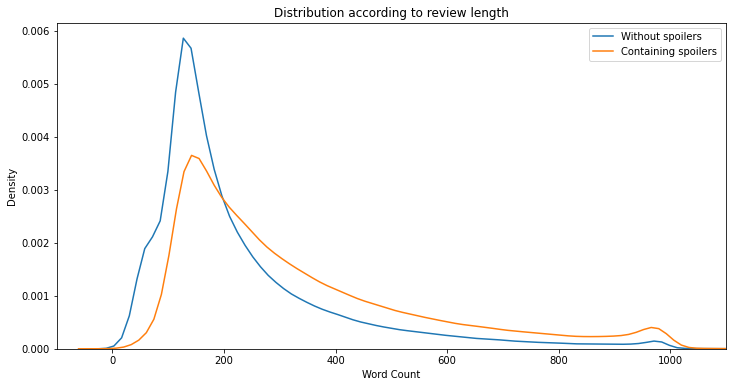

In [ ]:
plt.figure(figsize=(12, 6))
sns.distplot(df_temp2[df_temp2['is_spoiler'] == False]['word_count'], hist=False, label='Without spoilers')
sns.distplot(df_temp2[df_temp2['is_spoiler'] == True]['word_count'], hist=False, label='Containing spoilers')
plt.legend()
plt.xlim([-100, 1100])
plt.xlabel('Word Count')
plt.title('Distribution according to review length')
plt.show()

This clearly indicates that word count for reviews containing spoilers are mostly larger as compared to non-spoiler reviews

In [ ]:
df["word_count"]=df['review_text'].apply(lambda text: len(text.split(' ')))

In [ ]:
df_temp2["review_text"]=df["review_text"].str.lower()

In [ ]:
df_temp2["spoiltext"]=df_temp2.review_text.str.contains("spoil")+0

In [ ]:
df_temp2.review_text.str.contains("dies").value_counts()

False    539582
True      34324
Name: review_text, dtype: int64

In [ ]:
df_temp2["spoiltext"].value_counts()

0    535899
1     38007
Name: spoiltext, dtype: int64

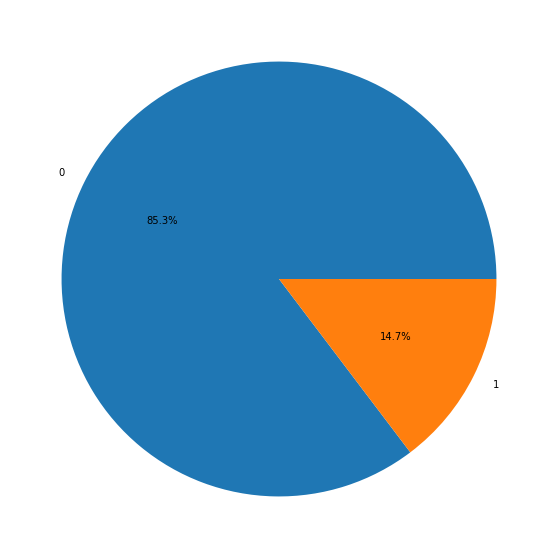

In [ ]:
labels, frequencies = np.unique(df_temp2[df_temp2["is_spoiler"]==1].spoiltext.values,return_counts = True)
plt.figure(figsize = (10,10))
plt.pie(frequencies,labels = labels, autopct = '%1.1f%%')
plt.show()

While the ratio itself isn't much appreciable but this can be a great criteria along with some other words that all spoiler reviews may contain frequently.

Lets further evaluate reviews using some NLP to find sembelance to spoilers  with the way they are written.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords=set(stopwords.words('english'))
stopwords_dict=Counter(stopwords)
def preprocesstext(review):
    review=review.lower()
    review=re.sub('[^a-zA-Z]',' ',review)
    words=review.split()
    word=[word for word in words if word not in stopwords_dict]
    review=" ".join(words)
    return review
df_temp2.review_text=df_temp2.review_text.apply(preprocesstext)

In [ ]:
df_temp2.review_text

0         in its oscar year shawshank redemption written...
1         the shawshank redemption is without a doubt on...
2         i believe that this film is the best story eve...
3         yes there are spoilers here this film has had ...
4         at the heart of this extraordinary movie is a ...
                                ...                        
573901    go is wise fast and pure entertainment assembl...
573902    well what shall i say this one s fun at any ra...
573903    go is the best movie i have ever seen and i ve...
573904    call this teenage version of pulp fiction what...
573905    why was this movie made no doubt to sucker in ...
Name: review_text, Length: 573906, dtype: object

In [ ]:
Counter(" ".join(df_temp2["review_text"][:200000]).split()).most_common(100)

[('the', 3290656),
 ('and', 1630399),
 ('a', 1436389),
 ('of', 1396191),
 ('to', 1276042),
 ('is', 1074861),
 ('it', 944538),
 ('i', 870044),
 ('in', 859430),
 ('that', 722125),
 ('this', 659288),
 ('s', 578380),
 ('movie', 488797),
 ('as', 445589),
 ('was', 443013),
 ('for', 421420),
 ('with', 417172),
 ('film', 414228),
 ('but', 406147),
 ('you', 350253),
 ('t', 312710),
 ('he', 309249),
 ('his', 306074),
 ('not', 303358),
 ('on', 283273),
 ('are', 274044),
 ('be', 260485),
 ('have', 251552),
 ('one', 248405),
 ('all', 244810),
 ('by', 206330),
 ('so', 204752),
 ('an', 201187),
 ('they', 193822),
 ('at', 193309),
 ('from', 193055),
 ('like', 188745),
 ('who', 173455),
 ('just', 173119),
 ('there', 173084),
 ('has', 169106),
 ('about', 165141),
 ('what', 162790),
 ('or', 153832),
 ('more', 153512),
 ('story', 151195),
 ('out', 144622),
 ('can', 144301),
 ('if', 143798),
 ('good', 139417),
 ('time', 137801),
 ('my', 132057),
 ('some', 130704),
 ('very', 130564),
 ('when', 129316),
 ('m

In [ ]:
df["spoiltext"]=df.review_text.str.contains("spoil")+0

Opposed to the intution the most common words as  can be seen bear no semantic role towards indicating a spoiler.Despite of this it is easy to infer that if  "spoiler" word is present in the review than its very likely to be a spoiler review so we will include this as a criteria.

In [ ]:
df_temp2=pd.DataFrame()

In [ ]:
df_temp2["year"]=df["review_date"].dt.year
df_temp2["is_spoiler"]=df["is_spoiler"]

In [ ]:
pivot_df=df_temp2.groupby(["year","is_spoiler"]).size().reset_index(name='count').sort_values('count')
pivot_df=pivot_df.pivot(index='year',  columns='is_spoiler', values='count')
pivot_df=pivot_df.fillna(0)[:-1]

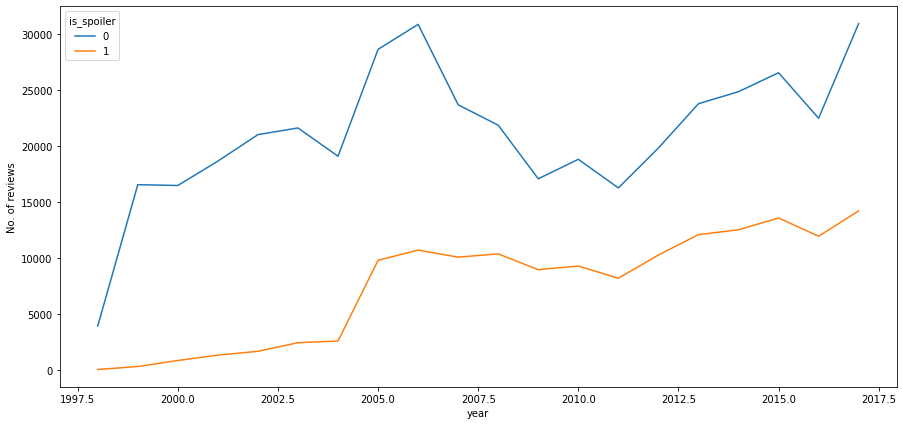

In [ ]:
pivot_df.plot(ylabel="No. of reviews",figsize=(15,7))

Nothing could make it more clear than this graph on why we need this project.Over the years with the accessebility to give reviews the trend of spoiler reviews has only increased and to keep the review sections spoil-free  for the users it is important to come up with a good tool to curb this as much as possible.

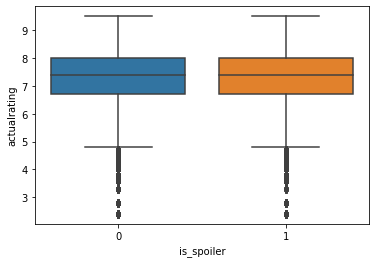

In [ ]:
sns.boxplot(x= df.is_spoiler,y=df.actualrating)

Almost the same  actualrating  data  variance for both kind of reviews .

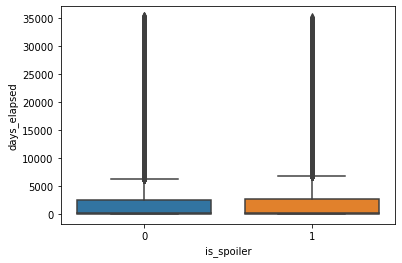

In [ ]:
sns.boxplot(x= df.is_spoiler,y=df.days_elapsed)

Clearly days_elapsed also have same kind of data distribution for both cases but in this case there are a lot of outliers.

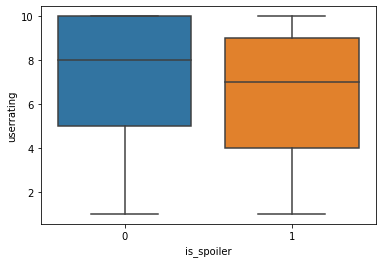

In [ ]:
sns.boxplot(x= df.is_spoiler,y=df.userrating)

User ratings for ratings with spoiler reviews are somewhat lower  overall as compared with without spoilers.

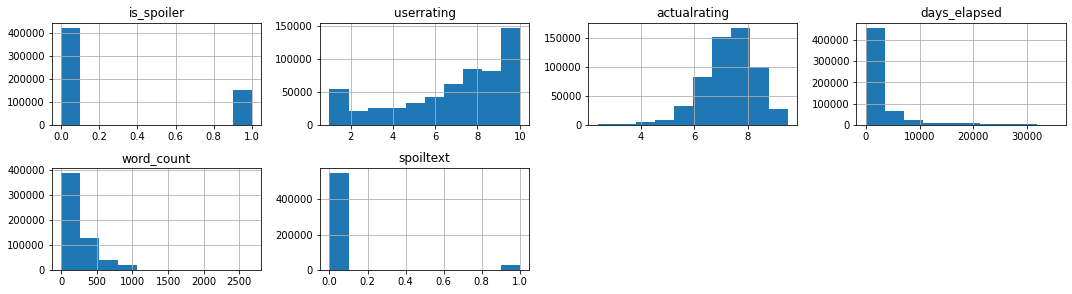

In [ ]:
df.hist(layout=(5,4), figsize=(15,10),)
plt.tight_layout()
plt.show()

Above fig helps in understanding the disrtibution of various features in the dataset where some new features have been added to help in the predictions.

In [ ]:
df.columns

Index(['review_date', 'movie_id', 'user_id', 'is_spoiler', 'review_text',
       'userrating', 'review_summary', 'plot_summary', 'duration', 'genre',
       'actualrating', 'release_date', 'plot_synopsis', 'days_elapsed',
       'word_count', 'spoiltext'],
      dtype='object')

After exploratory analysis  some key insights were gained which are as following:-


*   Some users,movies and genres have greater chances of containing reviews with spoilers so to exploit this  can create parameter corresponding each feature mentioned above where  assign every movie,user,genre pool a certain ratio attributing to its affinity for spoilers

*  Some spoilers will clearly contain the word "spoiler" indicative of it containing the spoilers so will assign a feature which tells us if review text for respective row contains the word "spoiler" or not 

*   The period  b/w review_date and release_date doesn't seem to be having any difference for spoiler and non spoiler reviews as evident from respective boxplot however it also holds information and might be helpful so will later try to make predictions both with and without it and compare the results

*   Can  also exploit the word count of reviews as a feature for the predictions 

* As can be observed  both review and corresponding plot summary so 
another good indicator for spoilers will be how close a review is to its plot synopsis 








In [ ]:
len(df)

573906

# Introducing new features based on observations from EDA

## Movie spoiler ratio(MSR)

For every movie  will compare its no. of reviews with spoilers to total no. of reviews for the movie  and assign this ratio as ***Movie spoiler ratio  aka msr***

In [ ]:
total_spoilers= df.groupby(by='movie_id').is_spoiler.agg(['sum']).reset_index().rename(columns={'sum':'total_spoilers'})

In [ ]:
total_movies = df.groupby(by='movie_id').movie_id.agg(['count']).reset_index().rename(columns={'count':'total_movies'})

In [ ]:
msr = pd.merge(total_spoilers,total_movies, on='movie_id')

In [ ]:
msr['msr']=msr.total_spoilers/msr.total_movies

In [ ]:
msr.head()

,movie_id,total_spoilers,total_movies,msr
0,0012349,26,104,0.250000
1,0015864,39,128,0.304688
2,0017136,73,337,0.216617
3,0017925,50,192,0.260417
4,0018455,63,178,0.353933


In [ ]:
msr.drop(['total_spoilers','total_movies'], axis=1, inplace=True)

In [ ]:
df=pd.merge(df,msr,on='movie_id')

In [ ]:
df

,review_date,movie_id,user_id,is_spoiler,review_text,userrating,review_summary,plot_summary,duration,genre,actualrating,release_date,plot_synopsis,days_elapsed,word_count,spoiltext,msr
0,2006-02-10,0111161,ur1898687,1,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",4137,843,0,0.219216
1,2000-09-06,0111161,ur0842118,1,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",2154,223,0,0.219216
2,2001-08-03,0111161,ur1285640,1,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",2485,250,0,0.219216
3,2002-09-01,0111161,ur1003471,1,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",2879,766,0,0.219216
4,2004-05-20,0111161,ur0226855,1,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",3506,829,0,0.219216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573901,1999-08-08,0139239,ur0100166,0,"Go is wise, fast and pure entertainment. Assem...",10,The best teen movie of the nineties,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",7.3,1999-04-09,"The film is told out of chronological format, ...",121,52,0,0.056338
573902,1999-07-31,0139239,ur0021767,0,"Well, what shall I say. this one´s fun at any ...",9,Go - see the movie,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",7.3,1999-04-09,"The film is told out of chronological format, ...",113,54,0,0.056338
573903,1999-07-20,0139239,ur0392750,0,"Go is the best movie I have ever seen, and I'v...",10,It's the best movie I've ever seen,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",7.3,1999-04-09,"The film is told out of chronological format, ...",102,202,0,0.056338
573904,1999-06-11,0139239,ur0349105,0,Call this 1999 teenage version of Pulp Fiction...,3,Haven't we seen this before?,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",7.3,1999-04-09,"The film is told out of chronological format, ...",63,89,0,0.056338


##User Spoiler Ratio (USR)

For every user  will compare its no. of reviews with spoilers to total no. of reviews from the user and assign this ratio as ***User spoiler ratio  aka  usr***

In [ ]:
total_user_spoilers = df.groupby(by='user_id').is_spoiler.agg(['sum']).reset_index().rename(columns={'sum':'total_user_spoilers'})


In [ ]:
total_users = df.groupby(by='user_id').user_id.agg(['count']).reset_index().rename(columns={'count':'total_users'})


In [ ]:
usr = pd.merge(total_user_spoilers,total_users, on='user_id')

In [ ]:
usr['usr']=usr.total_user_spoilers / usr.total_users

In [ ]:
usr.drop(['total_user_spoilers','total_users'], axis=1,inplace=True)

In [ ]:
df= pd.merge(df, usr, on='user_id')

## Genre Spoiler Ratio

For differenet genres there will be diffrent likelihood of having spoilers so i'll assign ratio similar to the way of USR and MSR for each genre category but for that first i'll introduce dummy columns for each major genre and assign values corresponding to each movie.

In [ ]:
df.head()

,review_date,movie_id,user_id,is_spoiler,review_text,userrating,review_summary,plot_summary,duration,genre,actualrating,release_date,plot_synopsis,days_elapsed,word_count,spoiltext,msr,usr
0,2006-02-10,0111161,ur1898687,1,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",4137,843,0,0.219216,0.6
1,2006-03-19,0144084,ur1898687,0,"Starring: Christian Bale, Willem Dafoe, Chloë ...",8,"Worth seeing, if only for the post-viewing dis...","Patrick Bateman is handsome, well educated and...",1h 42min,"[Crime, Drama]",7.6,2000-04-14,A white background. Red drops begin to fall pa...,2165,526,1,0.274725,0.6
2,2006-02-10,0298203,ur1898687,1,"Eminem's ""semi-autobiographical"" rap movie. Do...",7,Better than it needed to be.,This is the inspiring captivating story of the...,1h 50min,"[Drama, Music]",7.1,2002-11-08,"It's 1995. Jimmy ""B-Rabbit"" Smith Jr. (Eminem)...",1190,467,0,0.164456,0.6
3,2006-02-10,0319061,ur1898687,0,The grass is so green / The sky is so blue / S...,9,An immediate classic that works on both a visu...,United Press International journalist Will Blo...,2h 5min,"[Adventure, Drama, Fantasy]",8.0,2004-01-09,"Edward Bloom (Albert Finney), a charismatic te...",763,320,0,0.158416,0.6
4,2006-02-10,0377092,ur1898687,1,There are a few signs heading into Mean Girls ...,7,"A smart, but flawed, look at high school life","Her parents being zoologists, homeschooled Cad...",1h 37min,[Comedy],7.0,2004-04-30,Cady (Lindsay Lohan) is the 16-year-old home-s...,651,438,0,0.222472,0.6


In [ ]:
genres=np.unique(np.array(' '.join(df_details.genre.str.join(' ')).split()))

In [ ]:
genres

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'], dtype='<U9')

In [ ]:
genre_df=pd.DataFrame()

In [ ]:
for i in genres:
    genre_df[i.lower()]=0

In [ ]:
genre_df

,action,adventure,animation,biography,comedy,crime,drama,family,fantasy,film-noir,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western


In [ ]:
for i,data in df_details.iterrows():
    #Assigns details pertaining to a movie to a variable
    details=df_details[df_details.movie_id==data['movie_id']]
    genre_df.at[i,'movie_id']=data['movie_id']
    for genre in genres:
        #Checks if movie belongs to the genre or not 
        genre_df.at[i,genre.lower()]=int(genre in details['genre'].tolist()[0])

In [ ]:
genre_df

,action,adventure,animation,biography,comedy,crime,drama,family,fantasy,film-noir,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western,movie_id
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0105112
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1204975
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0243655
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0040897
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0126886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0289879
1568,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1723811
1569,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5013056
1570,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0104014/


In [ ]:
df_temp= pd.merge(df, genre_df, on="movie_id")

In [ ]:
df_temp

,review_date,movie_id,user_id,is_spoiler,review_text,userrating,review_summary,plot_summary,duration,genre,actualrating,release_date,plot_synopsis,days_elapsed,word_count,spoiltext,msr,usr,action,adventure,animation,biography,comedy,crime,drama,family,fantasy,film-noir,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western
0,2006-02-10,0111161,ur1898687,1,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",4137,843,0,0.219216,0.600000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000-09-06,0111161,ur0842118,1,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",2154,223,0,0.219216,0.250000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2001-08-03,0111161,ur1285640,1,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",2485,250,0,0.219216,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2002-09-01,0111161,ur1003471,1,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",2879,766,0,0.219216,0.500000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2004-05-20,0111161,ur0226855,1,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",3506,829,0,0.219216,0.135714,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573901,2017-12-22,5867800,ur25307523,0,Aruvi is a waterfall of human mixed-emotions p...,10,Waterfall of human mixed-emotions,A gentle girl born and brought up amidst the e...,2h 10min,[Drama],9.5,2017-12-15,,7,226,0,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573902,2017-12-22,5867800,ur83510976,0,Definitely a class apart. Excellent work by th...,10,One of the best movies in Indian cine Industry,A gentle girl born and brought up amidst the e...,2h 10min,[Drama],9.5,2017-12-15,,7,56,0,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573903,2017-12-21,5867800,ur54551299,0,Aruvi will be one of the iconic movie of Tamil...,9,Aruvi - A Masterpiece,A gentle girl born and brought up amidst the e...,2h 10min,[Drama],9.5,2017-12-15,,6,336,0,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573904,2017-12-19,5867800,ur48291086,0,"Rolling Sirrrrr ,\nSuch a hard hitting and gut...",10,Aruvi - Ever Best in Indian Cinema,A gentle girl born and brought up amidst the e...,2h 10min,[Drama],9.5,2017-12-15,,4,109,0,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
e = 0.001
gsr = np.zeros(len(genres))
for i,g in enumerate(genres):
    # i.e. total no. of reviews with spoiler belonging to a genre /total no. of reviews of movie genre
    gsr[i] = df_temp[(df_temp.is_spoiler==1) & (df_temp[g.lower()]==1)].shape[0] / (df_temp[df_temp[g.lower()]==1].shape[0]+e)

<h1>Based on (total no. of reviews with spoiler belonging to a genre /total no. of reviews of movie genre) we will assign gsr to individual genres and then combine these gsr for individual genres to get total gsr for a movie as movie items contain more than one genre<h2/>

In [ ]:
genres

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'], dtype='<U9')

In [ ]:
gsr

array([0.28260197, 0.28689807, 0.25694626, 0.24139909, 0.2156022 ,
       0.24629342, 0.25653166, 0.27053262, 0.28138213, 0.27247333,
       0.23578351, 0.29666125, 0.20991318, 0.20297205, 0.28947245,
       0.23652655, 0.31211931, 0.23998089, 0.28114596, 0.24305825,
       0.25500944])

In [ ]:
genre_ratio=dict(zip(genres,gsr))

In [ ]:
genre_ratio

{'Action': 0.2826019689770604,
 'Adventure': 0.2868980672694758,
 'Animation': 0.2569462624752317,
 'Biography': 0.24139909259675923,
 'Comedy': 0.21560219893208551,
 'Crime': 0.24629342348597225,
 'Drama': 0.2565316551820167,
 'Family': 0.2705326153205942,
 'Fantasy': 0.2813821333707472,
 'Film-Noir': 0.2724733263688853,
 'History': 0.2357835086408125,
 'Horror': 0.2966612453689029,
 'Music': 0.20991317840187546,
 'Musical': 0.20297205455381395,
 'Mystery': 0.2894724471206937,
 'Romance': 0.23652654812482177,
 'Sci-Fi': 0.31211930599561166,
 'Sport': 0.2399808874068598,
 'Thriller': 0.2811459627482807,
 'War': 0.24305824764780526,
 'Western': 0.2550094378803126}

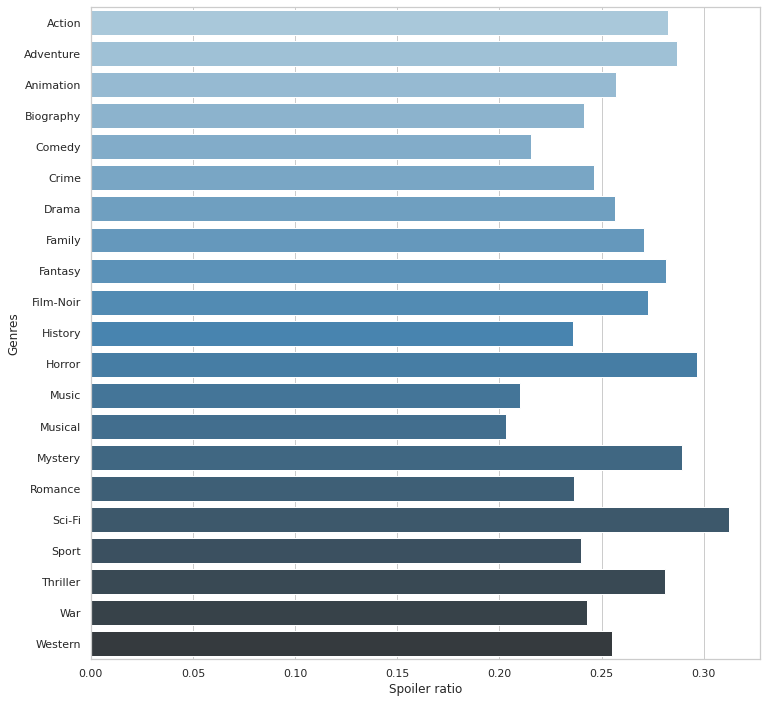

In [ ]:
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=gsr,y=genres,palette="Blues_d")
ax.set(xlabel="Spoiler ratio",ylabel="Genres");
plt.show();

In [ ]:
def genrespoilerratio(list):
  value=0
  for i in list:
    value+=genre_ratio[i]
  return value   

In [ ]:
df['gsr'] = pd.merge(df,df_details.drop(['genre'],axis=1),on="movie_id").genre.progress_apply(genrespoilerratio)

100%|██████████| 573906/573906 [00:01<00:00, 469583.87it/s]


In [ ]:
df

,review_date,movie_id,user_id,is_spoiler,review_text,userrating,review_summary,plot_summary,duration,genre,actualrating,release_date,plot_synopsis,days_elapsed,word_count,spoiltext,msr,usr,gsr
0,2006-02-10,0111161,ur1898687,1,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",4137,843,0,0.219216,0.6,0.502825
1,2006-03-19,0144084,ur1898687,0,"Starring: Christian Bale, Willem Dafoe, Chloë ...",8,"Worth seeing, if only for the post-viewing dis...","Patrick Bateman is handsome, well educated and...",1h 42min,"[Crime, Drama]",7.6,2000-04-14,A white background. Red drops begin to fall pa...,2165,526,1,0.274725,0.6,0.502825
2,2006-02-10,0298203,ur1898687,1,"Eminem's ""semi-autobiographical"" rap movie. Do...",7,Better than it needed to be.,This is the inspiring captivating story of the...,1h 50min,"[Drama, Music]",7.1,2002-11-08,"It's 1995. Jimmy ""B-Rabbit"" Smith Jr. (Eminem)...",1190,467,0,0.164456,0.6,0.502825
3,2006-02-10,0319061,ur1898687,0,The grass is so green / The sky is so blue / S...,9,An immediate classic that works on both a visu...,United Press International journalist Will Blo...,2h 5min,"[Adventure, Drama, Fantasy]",8.0,2004-01-09,"Edward Bloom (Albert Finney), a charismatic te...",763,320,0,0.158416,0.6,0.502825
4,2006-02-10,0377092,ur1898687,1,There are a few signs heading into Mean Girls ...,7,"A smart, but flawed, look at high school life","Her parents being zoologists, homeschooled Cad...",1h 37min,[Comedy],7.0,2004-04-30,Cady (Lindsay Lohan) is the 16-year-old home-s...,651,438,0,0.222472,0.6,0.502825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573901,1999-08-18,0139239,ur0419756,0,I think this movie was under-appreciated by Am...,10,innovative and rockin'...I love Go!,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",7.3,1999-04-09,"The film is told out of chronological format, ...",131,45,0,0.056338,0.0,0.256532
573902,1999-08-14,0139239,ur0415521,0,This type of movie is one that I would not ord...,9,GO see it!,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",7.3,1999-04-09,"The film is told out of chronological format, ...",127,89,0,0.056338,0.0,0.256532
573903,1999-08-08,0139239,ur0100166,0,"Go is wise, fast and pure entertainment. Assem...",10,The best teen movie of the nineties,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",7.3,1999-04-09,"The film is told out of chronological format, ...",121,52,0,0.056338,0.0,0.256532
573904,1999-07-20,0139239,ur0392750,0,"Go is the best movie I have ever seen, and I'v...",10,It's the best movie I've ever seen,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",7.3,1999-04-09,"The film is told out of chronological format, ...",102,202,0,0.056338,0.0,0.256532


##  Matching Text from reviews with plot summary 

 will find distance between plot summary and  the corresponding reviews.Lesser the distance more is the probability of them containing same information i.e. spoilers . So in order to do this  will first preprocess the text to remove all non alphabetical characters and stop words from the review_text and plot summary and then using glove embeddings will filnd distance between them .

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))
stopwords_dict=Counter(stopwords)
def preprocesstext(text):
    text=text.lower()
    text=re.sub('[^a-zA-Z]',' ',text)
    words=text.split()
    word=[word for word in words if word not in stopwords_dict]
    text=" ".join(words)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.review_text=df.review_text.apply(preprocesstext)
df.plot_summary=df.plot_summary.apply(preprocesstext)


Using glove-global-vectors for words.These pre-trained embeddings are used  to quantify word co-occurrence (which also captures some aspects of word meaning). This dataset contains 50-dimensional, 100-dimensional and 200-dimensional pre trained word vectors.Here i'll be using 50 dimensional one.

In [ ]:
#Saving the words and their corresponding vectors in  a dictionary
embeddings=dict()
f=open('/content/glove.6B.50d.txt')
for i in f: 
    values=i.split()
    word=values[0]
    cofss = np.asarray(values[1:], dtype='float32')
    embeddings[word]=cofss
f.close()    

In [ ]:
def getAvgWordEmbedding(text):
    words = text.split()
    n = 0
    sumEmbed = np.zeros(50)
    # because 50 dim of word vectors
    
    for word in words:
        if word in embeddings:
            sumEmbed += embeddings[word]
            n += 1
    
    avgEmbed = sumEmbed / n
    return avgEmbed
    
def Dist(e1, e2):
    return np.sum(np.square(e1-e2), axis = 1)

In [ ]:
plot_embed = df.plot_summary.progress_apply(getAvgWordEmbedding)

100%|██████████| 573906/573906 [02:11<00:00, 4356.50it/s]


In [ ]:
review_embed = df.review_text.progress_apply(getAvgWordEmbedding)

100%|██████████| 573906/573906 [05:38<00:00, 1697.58it/s]


In [ ]:
df['distance_plot']=Dist(np.stack(review_embed),np.stack(plot_embed))

# Saving the processed dataset for future use


In [ ]:
df.to_csv('/content/drive/MyDrive/Spoiler_alert_model/processed_data/processed_data.csv',index=False)

#Preparing  Train / Valid / Test Sets


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Spoiler_alert_model/processed_data/processed_data.csv')

In [ ]:
df.head()

,review_date,movie_id,user_id,is_spoiler,review_text,userrating,review_summary,plot_summary,duration,genre,actualrating,release_date,plot_synopsis,days_elapsed,word_count,spoiltext,msr,usr,gsr,distance_plot
0,2006-02-10,111161,ur1898687,1,in its oscar year shawshank redemption written...,10,A classic piece of unforgettable film-making.,chronicles the experiences of a formerly succe...,2h 22min,"['Crime', 'Drama']",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",4137,843,0,0.219216,0.6,0.502825,0.670662
1,2006-03-19,144084,ur1898687,0,starring christian bale willem dafoe chlo sevi...,8,"Worth seeing, if only for the post-viewing dis...",patrick bateman is handsome well educated and ...,1h 42min,"['Crime', 'Drama']",7.6,2000-04-14,A white background. Red drops begin to fall pa...,2165,526,1,0.274725,0.6,0.502825,0.529877
2,2006-02-10,298203,ur1898687,1,eminem s semi autobiographical rap movie do i ...,7,Better than it needed to be.,this is the inspiring captivating story of the...,1h 50min,"['Drama', 'Music']",7.1,2002-11-08,"It's 1995. Jimmy ""B-Rabbit"" Smith Jr. (Eminem)...",1190,467,0,0.164456,0.6,0.502825,0.287624
3,2006-02-10,319061,ur1898687,0,the grass is so green the sky is so blue spect...,9,An immediate classic that works on both a visu...,united press international journalist will blo...,2h 5min,"['Adventure', 'Drama', 'Fantasy']",8.0,2004-01-09,"Edward Bloom (Albert Finney), a charismatic te...",763,320,0,0.158416,0.6,0.502825,0.636278
4,2006-02-10,377092,ur1898687,1,there are a few signs heading into mean girls ...,7,"A smart, but flawed, look at high school life",her parents being zoologists homeschooled cady...,1h 37min,['Comedy'],7.0,2004-04-30,Cady (Lindsay Lohan) is the 16-year-old home-s...,651,438,0,0.222472,0.6,0.502825,0.392562


In [ ]:
train,val = train_test_split(df, test_size=0.2, stratify=df["is_spoiler"])


In [ ]:
train,test=train_test_split(train, test_size=0.2, stratify=train["is_spoiler"])


# Read  Train/Valid/Sets 

In [ ]:
train.columns

Index(['review_date', 'movie_id', 'user_id', 'is_spoiler', 'review_text',
       'userrating', 'review_summary', 'plot_summary', 'duration', 'genre',
       'actualrating', 'release_date', 'plot_synopsis', 'days_elapsed',
       'word_count', 'spoiltext', 'msr', 'usr', 'gsr', 'distance_plot'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import Normalizer,StandardScaler

In [ ]:
columns=['days_elapsed','word_count','spoiltext','usr','msr','gsr','distance_plot','actualrating']


In [ ]:
x_train = train[columns].fillna(0)
x_train=Normalizer().fit_transform(x_train)
y_train=train['is_spoiler'].values

In [ ]:
x_test = val[columns].fillna(0)
x_test = Normalizer().fit_transform(x_test)
y_test=val['is_spoiler'].values

# Logistic Regression 

In [ ]:
logistic= LogisticRegression(random_state=42, max_iter=1000) 
logistic.fit(x_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=logistic.predict(x_test)

In [ ]:
print(logistic.score(x_test, y_test))

0.7370319388057361


In [ ]:
print('AUC: ', roc_auc_score(y_test, y_pred))


AUC:  0.5000165645188007


In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     84597
           1       1.00      0.00      0.00     30185

    accuracy                           0.74    114782
   macro avg       0.87      0.50      0.42    114782
weighted avg       0.81      0.74      0.63    114782

[[84597     0]
 [30184     1]]


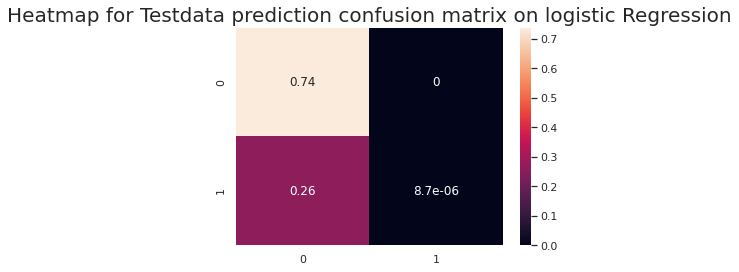

In [ ]:
plt.title("Heatmap for Testdata prediction confusion matrix on logistic Regression", fontsize =20)
sns.heatmap(confusion_matrix(y_test,y_pred)/np.sum(confusion_matrix(y_test, y_pred)), annot=True)

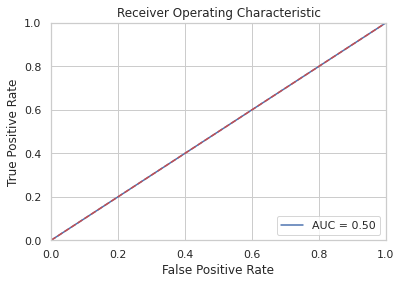

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

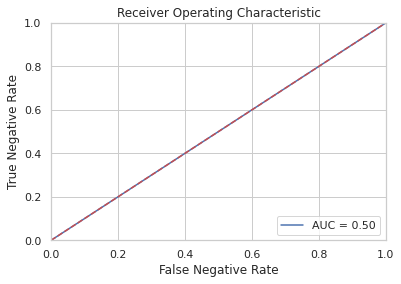

In [ ]:
roc_auc = metrics.auc(1-tpr, 1-fpr)
plt.title('Receiver Operating Characteristic')
plt.plot(1-tpr,1-fpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Negative Rate')
plt.xlabel('False Negative Rate')
plt.show()

# Random Forest 

<h2>Finding best hyperparameters</h2> 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 40, stop = 150, num = 15)]
max_depth = [int(x) for x in np.linspace(40, 150, num = 15)]
param_dist = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
}
rf_tuned = RandomForestClassifier(random_state = 42)


In [ ]:
rf_cv = RandomizedSearchCV(estimator = rf_tuned, param_distributions = param_dist, cv = 5, random_state = 42)
rf_cv.fit(x_train, y_train)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_cv.best_score_

0.9241979974442257

In [ ]:
rf_cv.best_params_

{'max_depth': 79, 'n_estimators': 126}

<h2>Training</h2> 

In [ ]:
model = RandomForestClassifier(min_samples_leaf=79,max_depth=79,random_state=42,n_estimators=126)

In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=79, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=79, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=126,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print('AUC: ', roc_auc_score(y_test, y_pred))



AUC:  0.8938762324852663


In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     84597
           1       0.88      0.83      0.85     30185

    accuracy                           0.92    114782
   macro avg       0.91      0.89      0.90    114782
weighted avg       0.92      0.92      0.92    114782

[[81103  3494]
 [ 5160 25025]]


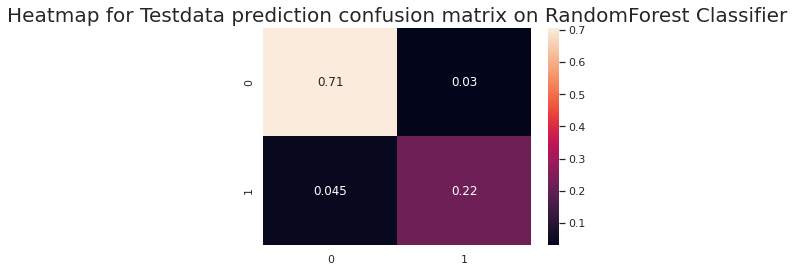

In [ ]:
plt.title("Heatmap for Testdata prediction confusion matrix on RandomForest Classifier", fontsize =20)
sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred)), annot=True)

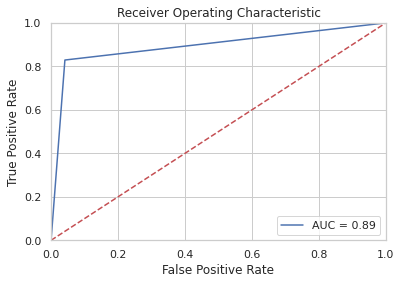

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

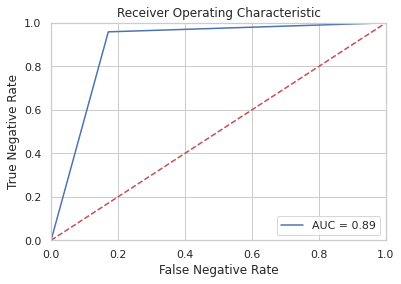

In [ ]:
roc_auc = metrics.auc(1-tpr, 1-fpr)
plt.title('Receiver Operating Characteristic')
plt.plot(1-tpr,1-fpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Negative Rate')
plt.xlabel('False Negative Rate')
plt.show()

# XGB

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier(random_state=42,learning_rate =0.1,
 n_estimators=1000,
 max_depth=50,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.9208935198898782

In [ ]:
accuracy_score(y_test, y_pred)

0.9269571884093325

In [ ]:
print('AUC: ', roc_auc_score(y_test, y_pred))


AUC:  0.889302162964856


In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     84597
           1       0.87      0.82      0.85     30185

    accuracy                           0.92    114782
   macro avg       0.90      0.89      0.90    114782
weighted avg       0.92      0.92      0.92    114782

[[80870  3727]
 [ 5353 24832]]


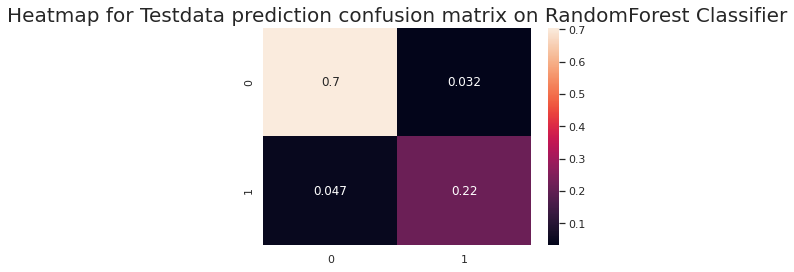

In [ ]:
plt.title("Heatmap for Testdata prediction confusion matrix on RandomForest Classifier", fontsize =20)
sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred)), annot=True)

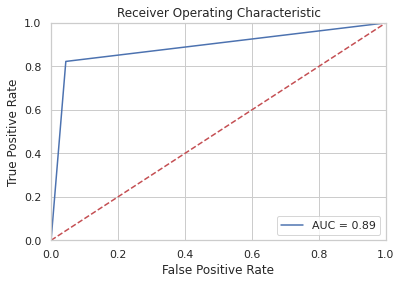

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

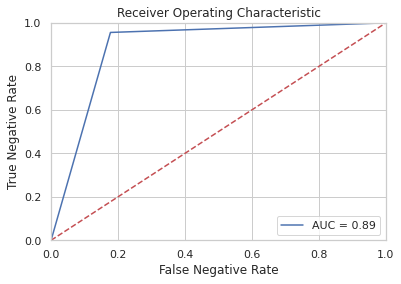

In [ ]:
roc_auc = metrics.auc(1-tpr, 1-fpr)
plt.title('Receiver Operating Characteristic')
plt.plot(1-tpr,1-fpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Negative Rate')
plt.xlabel('False Negative Rate')
plt.show()

# Saving + Loading the Model  and predicting on Test data

In [ ]:
filename = '/content/drive/MyDrive/Spoiler_alert_model/Spoiler_alert_randomforest.sav'



In [ ]:
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model_randomforest= pickle.load(open(filename, 'rb'))


In [ ]:
test

,review_date,movie_id,user_id,is_spoiler,review_text,userrating,review_summary,plot_summary,duration,genre,actualrating,release_date,plot_synopsis,days_elapsed,word_count,spoiltext,msr,usr,gsr,distance_plot
511264,2008-12-05,457510,ur20231140,0,in its context the movie is indeed slapstick h...,8,cinematography is the key,nacho black is a monastery cook who spends his...,1h 32min,"['Comedy', 'Family', 'Sport']",5.7,2006-06-16,Ignácio (Jack Black) is a young orphan boy dre...,903,82,0,0.132530,0.000000,0.792298,1.723233
134590,2000-07-04,134119,ur0779511,0,the talented mr ripley i feel has been the mos...,8,Great cast + Great director/writer = Great movie!,the s manhattan lavatory attendant tom ripley ...,2h 19min,"['Crime', 'Drama', 'Thriller']",7.3,1999-12-25,Tom Ripley (Matt Damon) is a young man struggl...,192,213,0,0.182903,0.083333,0.792298,0.636997
6601,2011-07-21,1478338,ur12682317,0,this was actually a really nice surprise i pic...,3,Funny Surprise,annie kristen wiig is a maid of honor whose li...,2h 5min,"['Comedy', 'Romance']",6.8,2011-05-13,Annie Walker (Kristen Wiig) is a single woman ...,69,283,0,0.255474,0.894118,0.735373,1.470332
388973,2013-12-08,1951264,ur28222349,0,ok maybe i exaggerated a little but it is an i...,7,Stunning plot possibilities gone to waste,twelve months after winning the th hunger game...,2h 26min,"['Action', 'Adventure', 'Mystery']",7.5,2013-11-22,Six months after winning the 74th Hunger Games...,16,234,0,0.344288,0.000000,0.493058,0.989165
445446,2001-06-18,183790,ur0155027,0,i really enjoyed this movie a lot it was done ...,8,Warm Hearted and Funny,inspired by the canterbury tales as well as th...,2h 12min,"['Action', 'Adventure', 'Romance']",6.9,2001-05-11,"(As it was said, may contain SPOILERS. Well, I...",38,57,0,0.102041,0.000000,0.810041,2.078087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310651,2017-09-30,5362988,ur37569728,0,heard a lot of raves about this movie sorry to...,1,"Very bad, not worth your time.",wind river is a chilling thriller that follows...,1h 47min,"['Crime', 'Drama', 'Mystery']",7.8,2017-08-18,"The movie opens at night in a cold, remote Wyo...",43,75,0,0.251799,0.090909,0.853220,1.812611
34990,2017-05-11,114148,ur53053227,0,this is certainly one of the most notable anim...,7,"A remarkable, wonderful film, but that shows n...",this is the disney animated tale of the romanc...,1h 21min,"['Animation', 'Adventure', 'Drama']",6.7,1995-06-23,NaN,7993,238,0,0.293413,0.018519,0.784829,1.253888
110459,2009-07-12,106770,ur0746682,0,i just watched the dvd i bought based on john ...,8,An Amazing Story of an Amazing Man,based on the life and career of martial arts s...,2h,"['Action', 'Biography', 'Drama']",7.0,1993-05-07,NaN,5910,378,0,0.241935,0.058824,0.497931,0.525747
532708,2009-03-31,1010048,ur20897613,1,i accept that i saw this film post hype it was...,3,Only good if you don't think about it.,the story of jamal malik an year old orphan fr...,2h,"['Drama', 'Romance']",8.0,2008-12-25,Slumdog Millionaire is the story of Jamal Mali...,96,378,0,0.318056,1.000000,0.256532,0.502292


In [ ]:
testdata=test[['days_elapsed','word_count','spoiltext','usr','msr','gsr','distance_plot','actualrating']].values

In [ ]:
testy=test[['is_spoiler']].values

In [ ]:
rfpred=loaded_model_randomforest.predict(testdata)

In [ ]:
resultrf = loaded_model_randomforest.score(testdata, testy)
print(resultrf)

0.7658589708684999


In [ ]:
roc_auc_score(testy, rfpred)


0.8408642741874031

In [ ]:
print(classification_report(testy, rfpred))
print(confusion_matrix(testy, rfpred))

              precision    recall  f1-score   support

           0       1.00      0.66      0.80     63315
           1       0.52      1.00      0.68     22898

    accuracy                           0.75     86213
   macro avg       0.76      0.83      0.74     86213
weighted avg       0.87      0.75      0.77     86213

[[42036 21279]
 [    6 22892]]


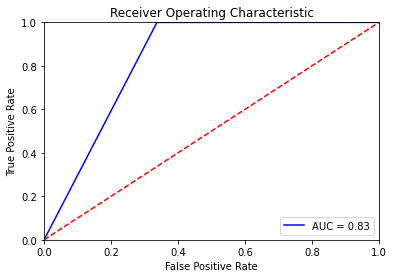

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testy, rfpred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

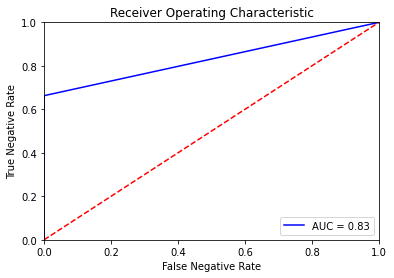

In [ ]:
roc_auc = metrics.auc(1-tpr, 1-fpr)
plt.title('Receiver Operating Characteristic')
plt.plot(1-tpr,1-fpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Negative Rate')
plt.xlabel('False Negative Rate')
plt.show()